# Рабочая тетрадь № 6
## Лосев Антон ИКБО-02-21

# 1.1.1 Пример
Пусть дана начальная популяция из четырех хромосом с двумя
генами x и y. Показатель качества хромосомы оценивается функцией Z.
При равном качестве хромосом предпочтение отдается хромосоме с
большим номером. На каждом этапе хромосома a с высшим качеством
порождает четыре новых хромосомы 𝑏1, 𝑐1, 𝑏2, 𝑐2, обмениваясь генами с
двумя хромосомами b и c более низкого качества по указанной схеме: \
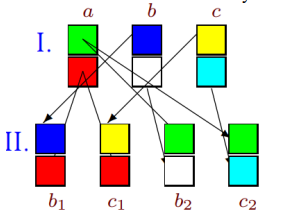

Последняя хромоcома (с низшим качеством) выбывает из
популяции. Найти максимальный показатель качества хромосомы в
популяции и общее качество популяции после четырех этапов эволюции.


In [3]:
# Функция качества хромосом
def qZ(x, y):
    return (x - 3 * y + 1) / (3 * x ** 2 + 3 * y ** 2 + 1)

# Сумма качества хромосом
def qSumZ(Z):
    return sum(Z)

# Схема обмена хромосомами
def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]
    
    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]
    X[0] = oldX[sortedId[0]]
    X[1] = oldX[sortedId[1]]
    
    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]
    Y[2] = oldY[sortedId[0]]
    Y[3] = oldY[sortedId[1]]
    
    return X, Y

# Сортировка массива качества потомков
def sorting(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
    return sortedId

# Шаг эволюции
def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]
    
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    
    return X, Y, Z

# Шаги эволюции (конечная функция), по умолчанию 4 шага
def evoSteps(X, Y, stepsNum = 4):
    results = []
    
    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
        
        X, Y, Z = evoStep(X, Y, arrZ)
        
        X, Y = exchangeScheme(X, Y, sorting(Z))
        
        results.append([X, Y, qSumZ(arrZ), arrZ])
    
    return X, Y, results

# Объявление массива хромосом
X = [-2, -1, 0, 1]
Y = [-2, -1, 0, 1]

# # Реализация алгоритма
results = evoSteps(X, Y)

# Выведем полученные значения
for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')
    
qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]
    
print(f'max Z:    {max(qualityArrZ)}')

max_1_step: 1.4857142857142858
max_2_step: 1.4615384615384615
max_3_step: 2.967032967032967
max_4_step: 3.5384615384615383
max Z:    1.0


### 1.1.1 Задание
Выполните по вариантам соответственно реализацию генетического
алгоритма в соответствии с приложенными начальными данными. \
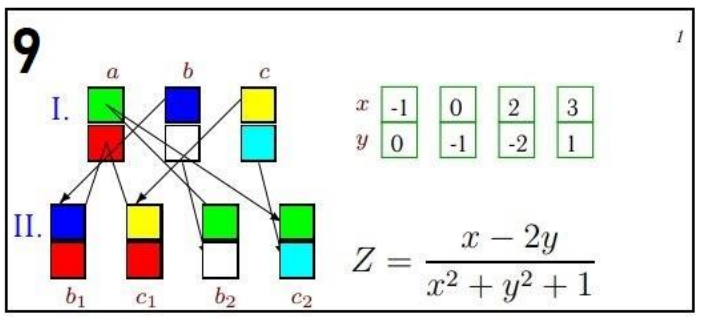

In [5]:
# Функция качества хромосом
def qZ(x, y):
    a = x - 2 * y
    b = x ** 2 + y ** 2 + 1
    return a / b

# Сумма качества хромосом
def qSumZ(Z):
    return sum(Z)

# Схема обмена хромосомами
def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]
    
    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]
    X[0] = oldX[sortedId[0]]
    X[1] = oldX[sortedId[1]]
    
    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]
    Y[2] = oldY[sortedId[0]]
    Y[3] = oldY[sortedId[1]]
    
    return X, Y

# Сортировка массива качества потомков
def sorting(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
    return sortedId

# Шаг эволюции
def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]
    
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    
    return X, Y, Z

# Шаги эволюции (конечная функция), по умолчанию 4 шага
def evoSteps(X, Y, stepsNum = 4):
    results = []
    
    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
        
        X, Y, Z = evoStep(X, Y, arrZ)
        
        X, Y = exchangeScheme(X, Y, sorting(Z))
        
        results.append([X, Y, qSumZ(arrZ), arrZ])
    
    return X, Y, results

# Объявление массива хромосом
X = [-1, 0, 2, 3]
Y = [0, -1, -2, 1]

# # Реализация алгоритма
results = evoSteps(X, Y)

# Выведем полученные значения
for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')
    
qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]
    
print(f'max Z:    {max(qualityArrZ)}')

max_1_step: 1.2575757575757573
max_2_step: 0.9212121212121211
max_3_step: 3.1666666666666665
max_4_step: 3.466666666666667
max Z:    1.0


### 1.2.1 Пример
Необходимо Найти длину гамильтонова цикла 𝑆4 в полном графе
𝐾6 после четырех циклов решения задачи методом отжига. Даны расстояния
𝐿𝑖,𝑗 между вершинами. Даны также: начальная последовательность вершин
𝐿0, последовательность замен вершин 𝑍 и выпавшие при этом вероятности
перехода 𝑃𝑘, 𝑘 = 1, . . . , 4. \
Переход на худшее (∆𝑆𝑘 = 𝑆𝑘 − 𝑆𝑘−1 > 0) решение допустим, если
𝑃∗ = 100где снижение температуры происходит по закону 𝑇𝑘+1 = 0.5𝑇𝑘 от
𝑇1 = 100.

Итак, начальные условия задачи представляют собой следующий граф с
расстояниями между ребрами \
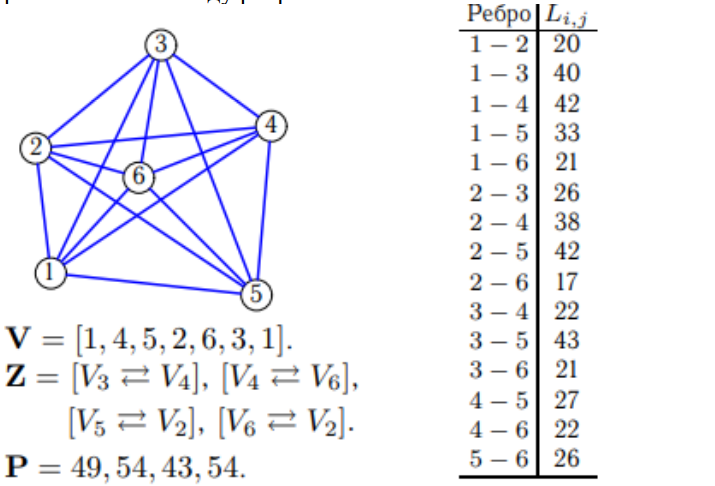

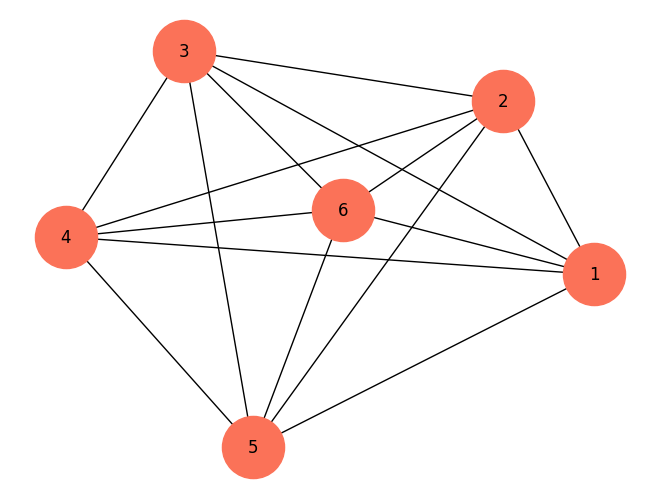

In [43]:
import networkx as nx
from math import e

# Длины ребер
distances = [(1, 2, 20),
             (1, 3, 40),
             (1, 4, 42),
             (1, 5, 33),
             (1, 6, 21),
             (2, 3, 26),
             (2, 4, 38),
             (2, 5, 42),
             (2, 6, 17),
             (3, 4, 22),
             (3, 5, 43),
             (3, 6, 21),
             (4, 5, 27),
             (4, 6, 22),
             (5, 6, 26),]

# Послеовательность замен верщин
Z = [(3, 4),
     (4, 6),
     (5, 2),
     (6, 2)]

V = [1, 4, 5, 2, 6, 3, 1] # последовательность прохождения маршрута
P = [49, 54, 43, 54]      # случайные числа, выпавшие в процессе счета
T = 100                   # начальаня температура

# Функция вероятности
def probability(delta, T):
    return 100 * e ** (-delta / T)

# Функция изменения температуры
def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT

graph = nx.Graph() # создание пустого графа
graph.add_weighted_edges_from(distances) # добавление весов ребер

# Отрисовка графа с заданными вершинами
nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

# Вычислене длины ребра
def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])
    
# Вычислим длины маршрута
def routeLength(V, distances):
    edges = []
    
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))

    return sum(edges)

# Одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0
    
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV

# Перестановки в пути
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

# Выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # нахождение длины пути
    arrSum = [sumLength] # массив сумм длин
    
    # Циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # нвоый маршрут после перестановки
        newS = routeLength(newV, distances) # длина нового пути
        arrSum.append(newS)
        deltaS = newS - sumLength # разница между длиной нового и старого марщрутов
        
        # В случае, если разница между длинами больше 0, то вычисляем вероятность
        if deltaS > 0:
            p = probability(deltaS, T) # подсчет вероятности
            
            # Если заданная вероятность попадает в интервал от 0 до P, то выбирается новый маршрут
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
            
        T = reductTemp(T) # вычисление температуры
    
    return V, arrSum

# Нарисуем наш граф с заданынм маршрутом
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # Прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)
    
    graph = nx.Graph() # создание пустого графа
    graph.add_weighted_edges_from(newDistances) # добавление весов ребер
    # Отрисовка графа с заданными вершинами
    nx.draw_kamada_kawai(graph, node_color='#fb6258', node_size=2000, with_labels=True)

Лучший выбранный маршрут: [1, 6, 2, 3, 4, 5, 1]
Длина лучшего выбранного маршрута: 146
Длина всех рассмотренных маршрутов: [189, 209, 186, 146, 166]


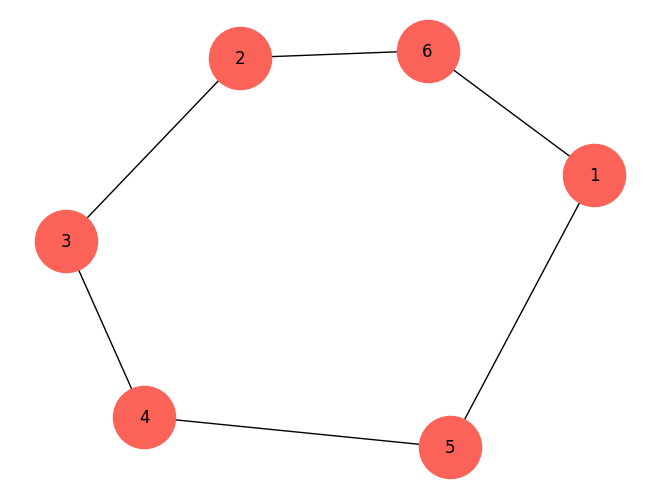

In [44]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длина всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute)

### 1.2.1 Задание
Найти длину гамильтонова цикла S4 в полном графе K6 после четырех
циклов решения задачи методом отжига по вариантам ниже. \
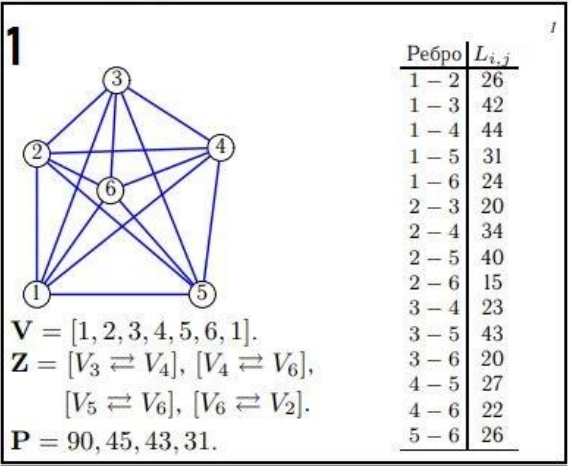

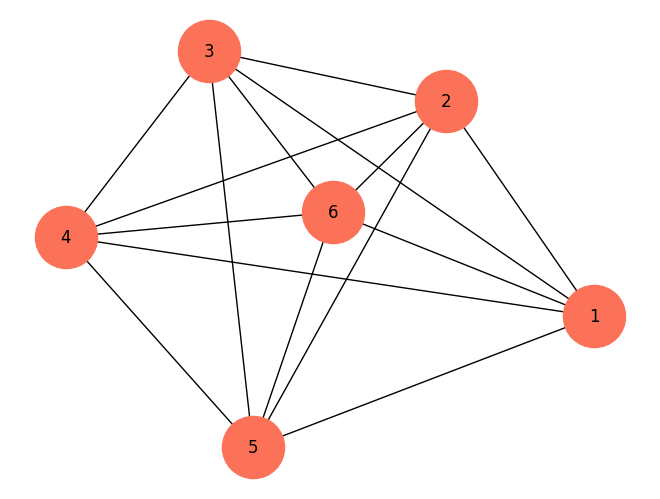

In [45]:
import networkx as nx
from math import e

# Длины ребер
distances = [(1, 2, 26),
             (1, 3, 42),
             (1, 4, 44),
             (1, 5, 31),
             (1, 6, 24),
             (2, 3, 20),
             (2, 4, 34),
             (2, 5, 40),
             (2, 6, 15),
             (3, 4, 23),
             (3, 5, 43),
             (3, 6, 20),
             (4, 5, 27),
             (4, 6, 22),
             (5, 6, 26),]

# Послеовательность замен верщин
Z = [(3, 4),
     (4, 6),
     (5, 6),
     (6, 2)]

V = [1, 2, 3, 4, 5, 6, 1] # последовательность прохождения маршрута
P = [90, 45, 43, 31]      # случайные числа, выпавшие в процессе счета
T = 100                   # начальаня температура

# Функция вероятности
def probability(delta, T):
    return 100 * e ** (-delta / T)

# Функция изменения температуры
def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT

graph = nx.Graph() # создание пустого графа
graph.add_weighted_edges_from(distances) # добавление весов ребер

# Отрисовка графа с заданными вершинами
nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

# Вычислене длины ребра
def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])
    
# Вычислим длины маршрута
def routeLength(V, distances):
    edges = []
    
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))

    return sum(edges)

# Одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0
    
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV

# Перестановки в пути
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

# Выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # нахождение длины пути
    arrSum = [sumLength] # массив сумм длин
    
    # Циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # нвоый маршрут после перестановки
        newS = routeLength(newV, distances) # длина нового пути
        arrSum.append(newS)
        deltaS = newS - sumLength # разница между длиной нового и старого марщрутов
        
        # В случае, если разница между длинами больше 0, то вычисляем вероятность
        if deltaS > 0:
            p = probability(deltaS, T) # подсчет вероятности
            
            # Если заданная вероятность попадает в интервал от 0 до P, то выбирается новый маршрут
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
            
        T = reductTemp(T) # вычисление температуры
    
    return V, arrSum

# Нарисуем наш граф с заданынм маршрутом
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # Прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)
    
    graph = nx.Graph() # создание пустого графа
    graph.add_weighted_edges_from(newDistances) # добавление весов ребер
    # Отрисовка графа с заданными вершинами
    nx.draw_kamada_kawai(graph, node_color='#fb6258', node_size=2000, with_labels=True)

Лучший выбранный маршрут: [1, 2, 3, 6, 4, 5, 1]
Длина лучшего выбранного маршрута: 146
Длина всех рассмотренных маршрутов: [146, 176, 163, 146, 176]


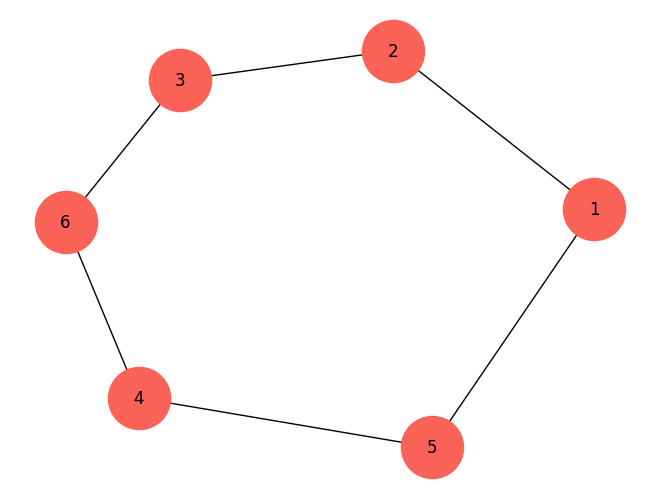

In [46]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длина всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute)